In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
def list_cameras():
    for i in range(5):
        camera = cv2.VideoCapture(i)
        if not camera.isOpened():
            print(i, "no camera")
        else:
            print(i, camera.getBackendName(), camera)
        camera.release()


def from_camera(n):
    cap = cv2.VideoCapture(n)
    ret, count = False, 2
    while not ret and count:
        ret, frame = cap.read()
        count -= 1
    cap.release()
    if frame is not None:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        plt.show()
        return frame
    else:
        return None

0 MSMF <VideoCapture 000001ED5DB738D0>
1 MSMF <VideoCapture 000001ED5B97A930>
2 DSHOW <VideoCapture 000001ED5B97AC10>
3 no camera
4 no camera


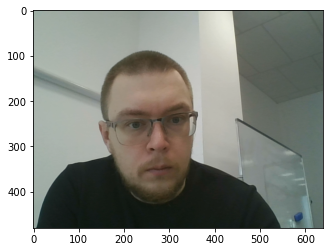

In [5]:
list_cameras()
img = from_camera(0)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

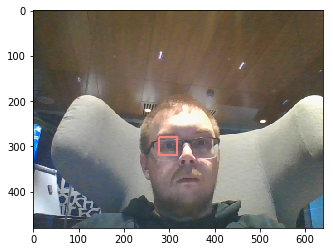

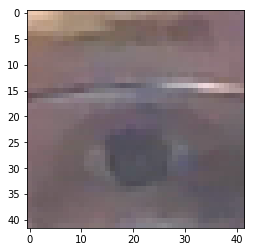

In [18]:
face_cascade = cv2.CascadeClassifier('datasets/ml/haar/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('datasets/ml/haar/haarcascade_eye.xml')
specs_cascade = cv2.CascadeClassifier('datasets/ml/haar/haarcascade_eye_tree_eyeglasses.xml')

eyes = eye_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=7,)

img_copy = img.copy()
for (x, y, w, h) in eyes:
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (255, 128, 128), 4)

plt.imshow(img_copy)
plt.show()


# TODO: 
# 1) take a group photo (or zoom screenshot)
# 2) detect all faces. tune parameters if needed
# 3) crop and display faces separately
# 4) scale them to 64x64 size. even if they are rectangualar
# e.g. here's my eye:
x, y, w, h = faces[0]
plt.imshow(img[x:x+w,y:y+h])
plt.show()